In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

import pywt
import pywt.data
from keras.datasets import mnist

In [2]:
from sklearn.naive_bayes import GaussianNB #NaiveBayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis #LDA, QDA
from sklearn.neighbors import NearestCentroid #NM
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.svm import SVC #SVM

In [3]:
(xTrain_mnist, y_train_mnist), (xTest_mnist, y_test_mnist) = mnist.load_data()

In [4]:
xTrain_mnist = np.reshape(xTrain_mnist, (xTrain_mnist.shape[0], -1))
xTest_mnist = np.reshape(xTest_mnist, (xTest_mnist.shape[0], -1))

y_train_mnist = np.array(y_train_mnist, dtype=int)
y_test_mnist = np.array(y_test_mnist, dtype=int)

In [5]:
def fit_model(name, sample, data,label):

    X_train, X_test, y_train, y_test = train_test_split(
        data, label, test_size=sample, shuffle=True
    )
    name.fit(X_train,y_train)
    predicted = name.predict(X_test)

    return predicted, X_test, y_test

In [6]:
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    NearestCentroid(),
    KNeighborsClassifier(n_neighbors=1),
    KNeighborsClassifier(n_neighbors=3, algorithm='brute'),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=7),
    KNeighborsClassifier(n_neighbors=21),
    SVC()  
]


## Haar

### HL

In [7]:
train_images_haar = np.empty(shape=(60000,14,14))
test_images_haar = np.empty(shape=(10000,14,14))

for i in range(len(X_train_mnist)):
    db_haar_mnist_train = pywt.dwt2(X_train_mnist[i], 'db1')
    LL, (LH, HL, HH) = db_haar_mnist_train
    train_images_haar[i] = HL

for i in range(len(X_test_mnist)):
    db_haar_mnist_test = pywt.dwt2(X_test_mnist[i], 'db1')
    LL, (LH, HL, HH) = db_haar_mnist_test
    test_images_haar[i] = HL

In [8]:
xTrain_mnist_haar = np.reshape(train_images_haar, (train_images_haar.shape[0], -1))
xTest_mnist_haar = np.reshape(test_images_haar, (test_images_haar.shape[0], -1))

In [11]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_haar, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.5104
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.780225
Model:  NearestCentroid()
Średnia dokłądności:  0.6194500000000001
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.804775
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.8067750000000002
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.802975
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.8001249999999999
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.7776
Model:  SVC()
Średnia dokłądności:  0.90195


### 2nd Decomposition


In [14]:
train_images_haar_2 = np.empty(shape=(60000,7,7))
test_images_haar_2 = np.empty(shape=(10000,7,7))

for i in range(len(train_images_haar)):
    db_haar_mnist_train = pywt.dwt2(train_images_haar[i], 'db1')
    LL, (LH, HL, HH) = db_haar_mnist_train
    train_images_haar_2[i] = HL

for i in range(len(test_images_haar)):
    db_haar_mnist_test = pywt.dwt2(test_images_haar[i], 'db1')
    LL, (LH, HL, HH) = db_haar_mnist_test
    test_images_haar_2[i] = HL

In [13]:
xTrain_mnist_haar_2 = np.reshape(train_images_haar_2, (train_images_haar_2.shape[0], -1))
xTest_mnist_haar_2 = np.reshape(test_images_haar_2, (test_images_haar_2.shape[0], -1))

In [15]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_haar_2, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.402475
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.6631250000000001
Model:  NearestCentroid()
Średnia dokłądności:  0.5144249999999999
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.7463
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.7495749999999999
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.76095
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.7661999999999999
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.7537
Model:  SVC()
Średnia dokłądności:  0.8283999999999999


### 3rd Decompsition

In [16]:
train_images_haar_3 = np.empty(shape=(60000,4,4))
test_images_haar_3 = np.empty(shape=(10000,4,4))

for i in range(len(train_images_haar_2)):
    db_haar_mnist_train = pywt.dwt2(train_images_haar_2[i], 'db1')
    LL, (LH, HL, HH) = db_haar_mnist_train
    train_images_haar_3[i] = LL

for i in range(len(test_images_haar_2)):
    db_haar_mnist_test = pywt.dwt2(test_images_haar_2[i], 'db1')
    LL, (LH, HL, HH) = db_haar_mnist_test
    test_images_haar_3[i] = LL

In [17]:
xTrain_mnist_haar_3 = np.reshape(train_images_haar_3, (train_images_haar_3.shape[0], -1))
xTest_mnist_haar_3 = np.reshape(test_images_haar_3, (test_images_haar_3.shape[0], -1))

In [18]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, xTest_mnist_haar_3, y_test_mnist)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.30822499999999997
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.2933
Model:  NearestCentroid()
Średnia dokłądności:  0.24522500000000003
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.44292499999999996
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.45315000000000005
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.472525
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.4824
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.48637499999999995
Model:  SVC()
Średnia dokłądności:  0.5316


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Parametry falki Daubechies 1


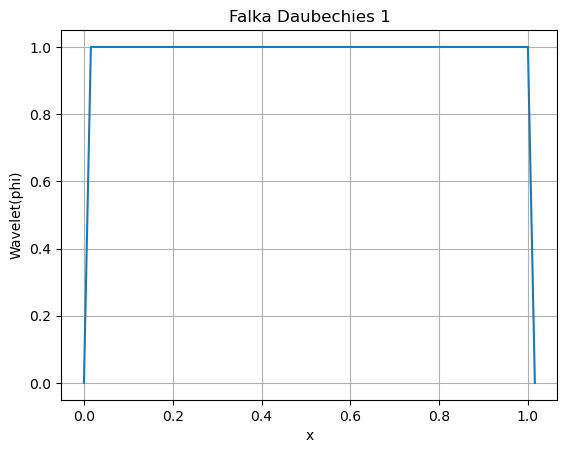

In [15]:
# Parametry falki Daubechies 1
wavelet_name = 'db1'
wavelet = pywt.Wavelet(wavelet_name)

# Generowanie funkcji falki
x = np.linspace(0, 1, num=1000)  # Zakres x
phi, psi, x = wavelet.wavefun(level=6)

# Rysowanie wykresu
plt.plot(x, phi)
plt.xlabel('x')
plt.ylabel('Wavelet(phi)')
plt.title('Falka Daubechies 1')
plt.grid(True)
plt.show()

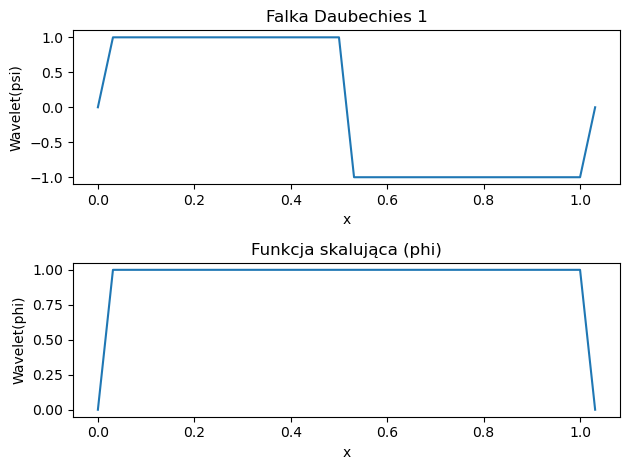

In [16]:

# Parametry falki Daubechies 1
wavelet_name = 'db1'
wavelet = pywt.Wavelet(wavelet_name)

# Generowanie funkcji falki
x = np.linspace(0, 1, num=1000)  # Zakres x
phi, psi, x = wavelet.wavefun(level=5)

# Tworzenie dwóch wykresów
fig, axs = plt.subplots(2, 1)

# Wykres falki
axs[0].plot(x, psi)
axs[0].set_xlabel('x')
axs[0].set_ylabel('Wavelet(psi)')
axs[0].set_title('Falka Daubechies 1')

# Wykres funkcji skalującej (phi)
axs[1].plot(x, phi)
axs[1].set_xlabel('x')
axs[1].set_ylabel('Wavelet(phi)')
axs[1].set_title('Funkcja skalująca (phi)')

# Dopasowanie układu wykresów
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()

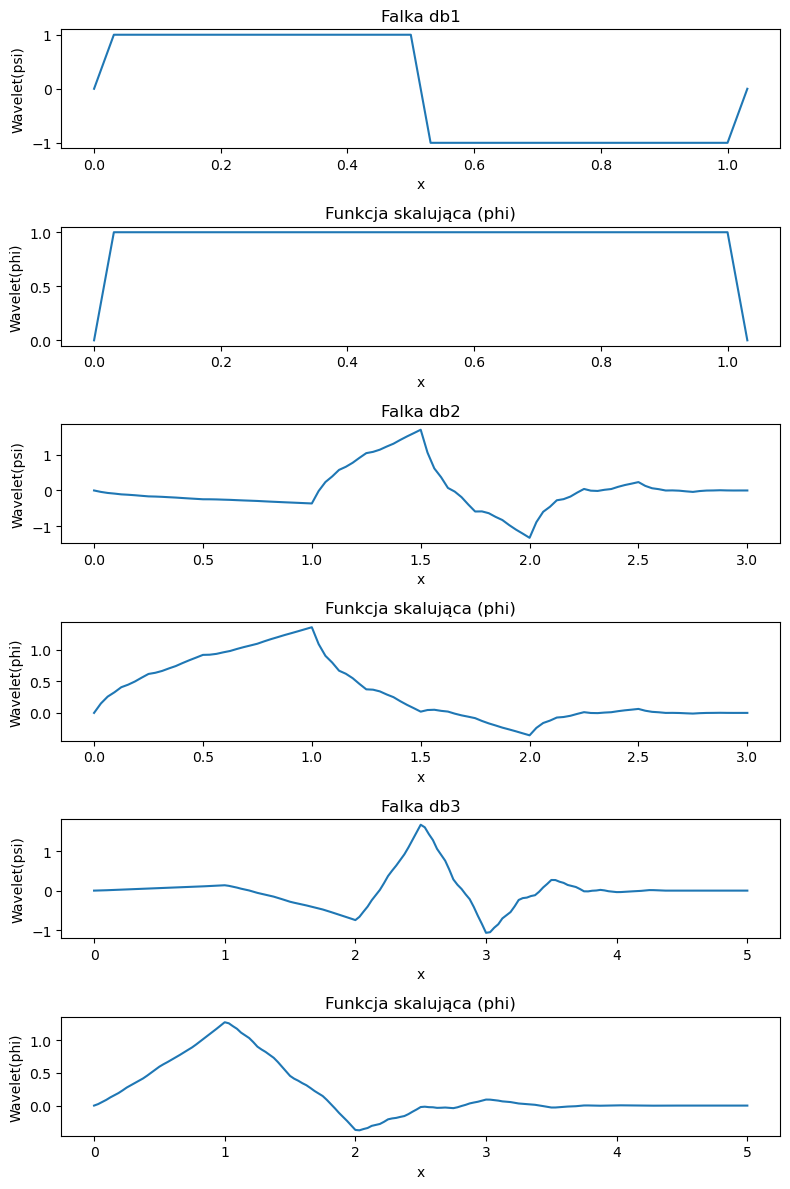

In [17]:
wavelet_names = ['db1', 'db2', 'db3']

# Tworzenie siatki wykresów
fig, axs = plt.subplots(6, 1, figsize=(8, 12))

# Iteracja po falkach Daubechies
for i, wavelet_name in enumerate(wavelet_names):
    # Tworzenie falki
    wavelet = pywt.Wavelet(wavelet_name)
    x = np.linspace(0, 1, num=1000)
    phi, psi, x = wavelet.wavefun(level=5)

    # Wykres falki
    axs[i * 2].plot(x, psi)
    axs[i * 2].set_xlabel('x')
    axs[i * 2].set_ylabel('Wavelet(psi)')
    axs[i * 2].set_title('Falka ' + wavelet_name)

    # Wykres funkcji skalującej (phi)
    axs[i * 2 + 1].plot(x, phi)
    axs[i * 2 + 1].set_xlabel('x')
    axs[i * 2 + 1].set_ylabel('Wavelet(phi)')
    axs[i * 2 + 1].set_title('Funkcja skalująca (phi)')

# Dopasowanie układu wykresów
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()

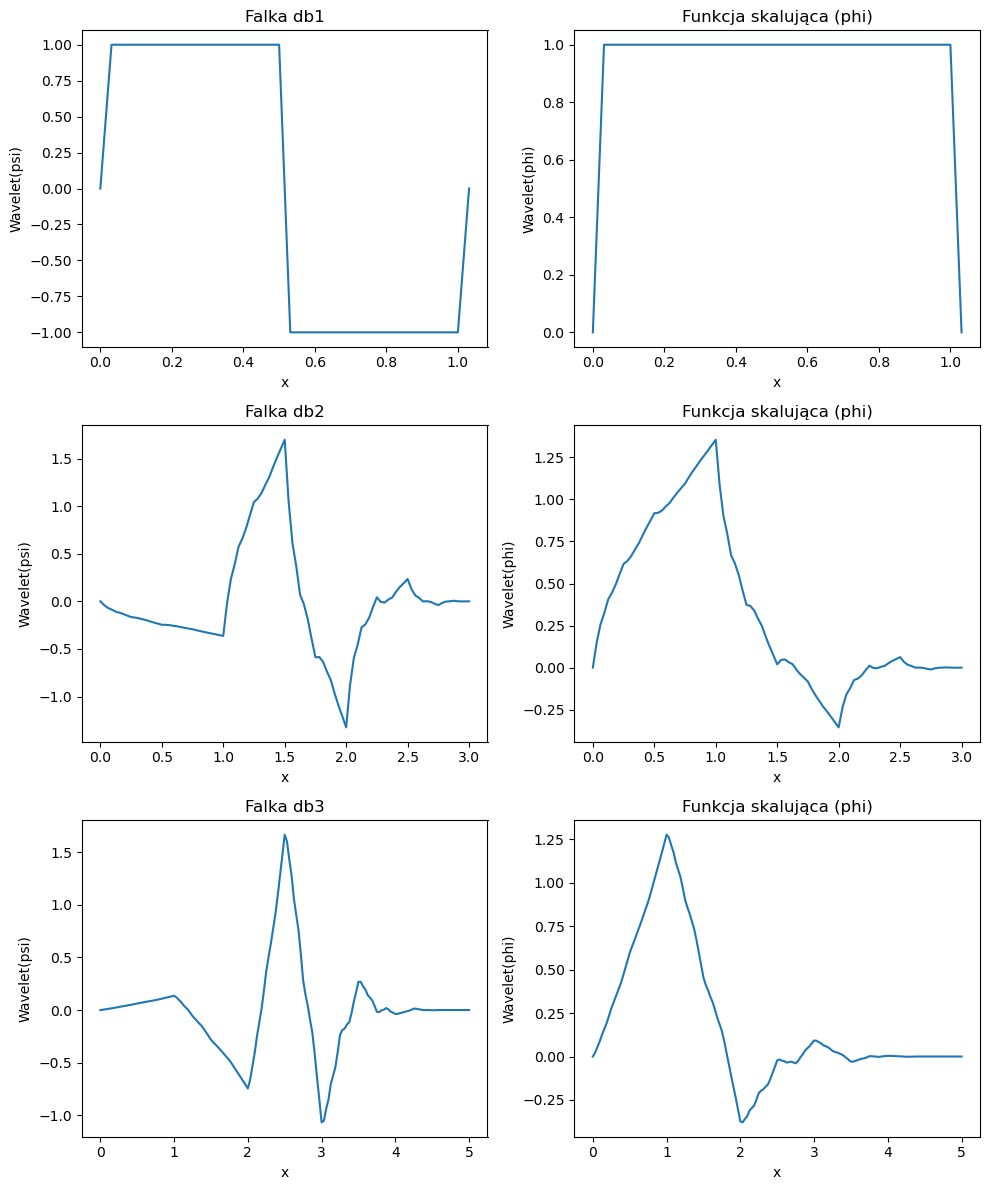

In [18]:
wavelet_names = ['db1', 'db2', 'db3']

# Tworzenie siatki wykresów
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Iteracja po falkach Daubechies
for i, wavelet_name in enumerate(wavelet_names):
    # Tworzenie falki
    wavelet = pywt.Wavelet(wavelet_name)
    x = np.linspace(0, 1, num=1000)
    phi, psi, x = wavelet.wavefun(level=5)

    # Wykres falki
    axs[i, 0].plot(x, psi)
    axs[i, 0].set_xlabel('x')
    axs[i, 0].set_ylabel('Wavelet(psi)')
    axs[i, 0].set_title('Falka ' + wavelet_name)

    # Wykres funkcji skalującej (phi)
    axs[i, 1].plot(x, phi)
    axs[i, 1].set_xlabel('x')
    axs[i, 1].set_ylabel('Wavelet(phi)')
    axs[i, 1].set_title('Funkcja skalująca (phi)')

# Dopasowanie układu wykresów
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()